### <center> Знакомство с данными

→ Сколько различных полных названий команд в таблице teams?

```sql
SELECT
    COUNT(DISTINCT long_name)
FROM sql.teams
```

→ Сколько в таблице teams команд с коротким названием VAL?

```sql
SELECT 
    COUNT(*)
FROM sql.teams
WHERE short_name = 'VAL'
```

→ Информацию о скольких матчах содержит таблица matches?
```sql
SELECT 
    COUNT(*)
FROM sql.matches
```

→ Данные за какие сезоны даны в таблице matches?

```sql
SELECT DISTINCT
    season
FROM sql.matches
ORDER BY season ASC
```

**Задание 1.2**

Напишите запрос, который выведет сезон (season), а также общее количество забитых мячей домашними (total_home_goals) и гостевыми (total_away_goals) командами.

Отсортируйте по столбцу с сезоном в порядке возрастания.

```sql
SELECT 
    season,
    SUM(home_team_goals) AS total_home_goals,
    SUM(away_team_goals) AS total_away_goals
FROM sql.matches
GROUP BY season
ORDER BY season ASC
```

### <center> 2. Соединение таблиц по ключу

##### <center> ОБЪЕДИНЯЕМ ТАБЛИЦЫ БЕЗ ОПЕРАТОРОВ

Чтобы соединить две таблицы между собой, достаточно записать названия таблиц через запятую в разделе `from`.

```sql
SELECT * /*выбор всех полей*/
FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/
```

Каждая запись, которая есть в таблице `teams`, будет соединена с каждой записью в таблице matches.

Это действие также называют **декартовым произведением таблиц.**

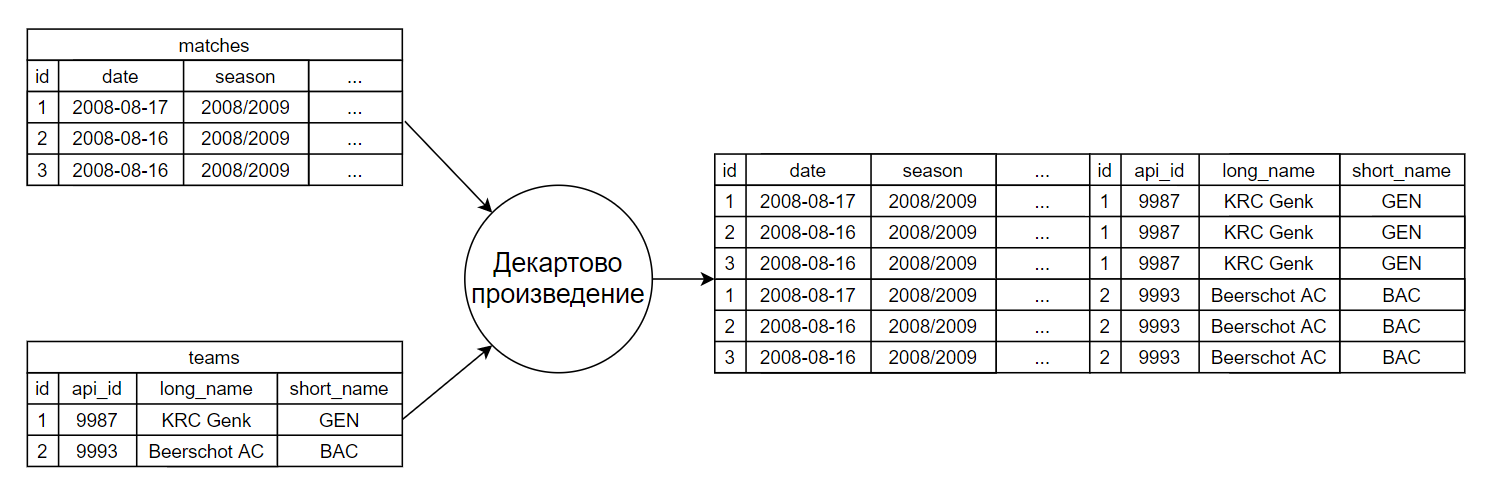

?
*Действительно ли это произведение?*

Легко проверить! В исходных таблицах `teams` и `matches` было 299 и 25083 записей соответственно. Если соединить каждую запись одной таблицы с каждой записью другой, получится 299 * 25083 записей в итоговой таблице.

**Задание 2.1**

Напишите запрос, который выведет количество строк соединённой таблицы.

```sql
SELECT 
    COUNT(*)
FROM
    sql.teams,
    sql.matches
```

В данном случае соединение таблиц не даёт практической пользы: мы получили очень много записей, которые никак не можем интерпретировать, потому что команды не соответствуют матчам.

Давайте исправим это. В таблице `teams` есть столбец `api_id`, а таблица `matches` содержит столбцы `home_team_api_id` и `away_team_api_id` — это ключи таблиц, по которым они соединяются.

>**Ключ** — это поле (столбец) в таблице, которое позволяет однозначно идентифицировать запись (строку).

Чтобы соединить таблицы и получить данные о домашней команде по каждому матчу, добавим условие
`where home_team_api_id = api_id`.

```sql
SELECT *
FROM
    sql.teams,
    sql.matches
WHERE home_team_api_id = api_id
```

Аналогично можем получить данные о гостевых командах: необходимо изменить условие на `where away_team_api_id = api_id.`

```sql
SELECT *
FROM
    sql.teams,
    sql.matches
WHERE away_team_api_id = api_id
```

Итак, мы только что объединили таблицы по ключу.

---

**Ключи** нужны для того, чтобы иметь возможность не перепутать между собой различные записи.

→ Например, у нас есть несколько команд с одинаковым названием: *Polonia Bytom*, *Widzew Łódź* и *Royal Excel Mouscron* — хотя это разные команды, с разными *id*

**Ключи бывают двух основных типов:**

1. *Primary* — **первичный ключ** — служит для идентификации текущей таблицы и, как правило, идёт первым в списке столбцов. Всегда уникален: повторяющихся значений в основной таблице быть не может.

2. *Foreign* — **внешний ключ** — представляет собой ссылку на другую таблицу.

Как правило, названия ключей имеют «хвост», который позволяет их идентифицировать: например, *_id*, *_rk*, *_cd*, *_pk* (от *primary_key*), *_fk* (от *foreign_key*) и другие.

>**Обратите внимание!** В данном датасете ключ *api_id* таблицы `teams` может быть использован в разных значениях. Его можно использовать для того, чтобы получить информацию о домашней (`home`) или гостевой (`away`) команде.

Как и при работе с одиночной таблицей, мы можем выбирать, какие столбцы соединённой таблицы выводить.

С помощью известного нам запроса получим названия команд, игравших домашние матчи, и счёт матчей.

```sql
SELECT
    long_name,
    home_team_goals,
    away_team_goals
FROM
    sql.teams,
    sql.matches
WHERE home_team_api_id = api_id
```

**Задание 2.2**

Напишите запрос, который выведет таблицу с результатами матчей для гостевых команд, содержащую:

- названия гостевых команд (`long_name`),
- количество забитых мячей домашней команды (`home_team_goals`),
- количество забитых мячей гостевой команды (`away_team_goals`).

```sql
SELECT
    long_name,
    home_team_goals,
    away_team_goals
FROM
    sql.teams,
    sql.matches
WHERE away_team_api_id = api_id
```

### <center> 3. Знакомимся с JOIN

✍ В прошлом юните для соединения таблиц мы использовали условие в разделе **where**, чтобы показать принцип работы оператора `JOIN`.

В качестве примера используем запрос из предыдущего юнита.

```sql
SELECT 
    long_name,
    home_team_goals,
    away_team_goals
FROM
    sql.teams,
    sql.matches
WHERE home_team_api_id = api_id
```

и запишем его с использованием `JOIN`.

```sql
SELECT 
    long_name,
    home_team_goals,
    away_team_goals
FROM
    sql.teams
JOIN sql.matches on home_team_api_id = api_id
```

##### <center> СИНТАКСИС

Оператор `JOIN` упрощает процесс соединения таблиц.

Его **синтаксис** можно представить следующим образом:

```sql
SELECT
        столбец1,
	столбец2,
	...
FROM
	таблица1
JOIN таблица2 ON условие
JOIN таблица3 ON условие
```

Порядок присоединения таблиц в **данном случае не важен** — результат будет одинаковым.

С помощью `JOIN` можно соединить и более двух таблиц.

```sql
SELECT
        столбец1,
	столбец2,
	...
FROM
	таблица1
JOIN таблица2 ON условие
JOIN таблица3 ON условие
```

В таблицах, которые мы соединяем, могут быть одинаковые названия столбцов.

>→ К примеру, столбец `id` есть и в таблице `matches`, и в таблице `teams`. **Такой запрос не будет обработан**.


```sql
SELECT
    id
FROM 
sql.teams
    JOIN sql.matches ON home_team_api_id = api_id
```

В результате должно появиться сообщение об ошибке вроде такого: `"... column id is ambiguous ..."`.

В таком случае можно указать, откуда мы хотим запросить данные, записав **название таблицы перед столбцом через точку**.

```sql
SELECT
    teams.id /*столбец id таблицы teams*/
FROM
    sql.teams
JOIN sql.matches ON home_team_api_id = api_id /*оператор соединения таблиц; таблица matches; условие: home_team_api_id таблицы matches равен api_id таблицы teams*/
```


Можно также выбрать и столбец из таблицы `matches`.

```sql
SELECT
    matches.id /*столбец id таблицы matches*/
FROM 
    sql.teams /*таблица teams*/
JOIN sql.matches ON home_team_api_id = api_id /*оператор соединения таблиц; таблица matches; условие: home_team_api_id таблицы matches равен api_id таблицы teams*/
```

Упростить обращение к различным таблицам можно, присвоив им сокращённые названия — **алиасы** (от англ. alias).

```sql
SELECT
        столбец1,
	столбец2,
	...
FROM
	таблица1 AS короткое_название_1
JOIN таблица2 AS короткое_название_2 ON условие
```

Если необходимо записать название, в котором используются пробелы (`"table 1"`), то алиас можно обернуть в кавычки.

>**Важно!** Обращаться по такому алиасу придётся также с помощью кавычек.

Ключевое слово `as`, как и в названии столбца, можно опустить в большинстве СУБД.

>Вместо алиасов с кавычками рекомендуется давать простое короткое название на латинице, без специальных символов и пробелов. Если таблиц немного и все названия начинаются с разных букв, можно присваивать алиасы по первой букве.

**Задание 3.2**

Напишите запрос, который выведет два столбца: id матча (`match_id`) и id домашней команды (`team_id`). Отсортируйте по id матча в порядке возрастания значений.

```sql
SELECT 
    matches.id as match_id,
    teams.id as team_id
FROM 
    sql.teams /*таблица teams*/
JOIN sql.matches ON home_team_api_id = api_id
ORDER BY match_id ASC
```

Давайте с помощью запроса *SQL* получим таблицу, содержащую:

- название домашней команды;
- количество забитых домашней командой голов;
- количество забитых гостевой командой голов;
- название гостевой команды.

```sql
SELECT
    h.long_name "домашняя команда", /*столбец long_name таблицы h*/
    m.home_team_goals "голы домашней команды", /*столбец home_team_goals таблицы m*/
    m.away_team_goals "голы гостевой команды", /*столбец away_team_goals таблицы m*/
    a.long_name "гостевая команда" /*столбец long_name таблицы a*/
FROM
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams h ON m.home_team_api_id = h.api_id /*оператор соединения таблиц; таблица teams с алиасом h; условие: home_team_api_id таблицы m равен api_id таблицы h*/
    JOIN sql.teams a ON m.away_team_api_id = a.api_id /*оператор соединения таблиц; таблица teams с алиасом a; условие: away_team_api_id таблицы m равен api_id таблицы a*/
```


**Задание 3.3**

Напишите запрос, который выведет столбцы:

- id матча,
- короткое название домашней команды (home_short),
- короткое название гостевой команды (away_short).

Отсортируйте запрос по возрастанию id матча.

```sql
SELECT
    m.id,
    h.short_name as home_short,
    a.short_name as away_short
FROM
    sql.matches as m
    JOIN sql.teams as h ON m.home_team_api_id = h.api_id
    JOIN sql.teams as a ON m.away_team_api_id = a.api_id
```

### <center> 4. Фильтрация и агрегатные функции

##### <center> РАБОТА С ОБЪЕДИНЕННЫМИ ТАБЛИЦАМИ

Принцип построения запроса и порядок операторов такой же, как и с обычной таблицей.

Вспомним его:

```sql
SELECT... 
FROM... 
WHERE... 
GROUP BY... 
ORDER BY... 
LIMIT...
```

**ФИЛЬТРАЦИЯ ДАННЫХ**

Выведем *id* матчей, в которых команда *Arsenal* была гостевой.

```sql
SELECT
    m.id
FROM
    sql.teams t
    JOIN sql.matches m ON m.away_team_api_id = t.api_id /*оператор соединения таблиц; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен api_id таблицы t*/
WHERE long_name = 'Arsenal' /*long_name таблицы teams имеет значение Arsenal*/
```

>Принципиальное отличие фильтрации данных по соединённым таблицам от аналогичного действия по одиночным таблицам заключается в том, что, фильтруя записи одной таблицы, мы также будем фильтровать и записи другой таблицы, поскольку соединённые на уровне запроса таблицы по сути являются единой таблицей.

Например, результат запроса 

```sql
SELECT
    m.id id_1,
    m.season,
    t.id id_2,
    t.long_name
FROM
    sql.teams t
JOIN sql.matches m ON m.away_team_api_id = t.api_id
```

можно раздедить на две разные части

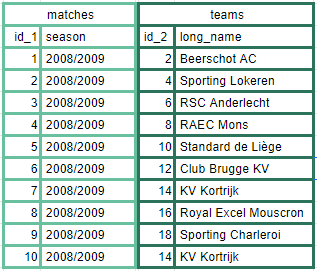

Одна часть — таблица `matches` с алиасом `m`, вторая — `teams` с алиасом `t`, но после соединения они являются одной таблицей.

Таким образом, если вы отфильтруете данные по одной части таблицы, то другая, соединённая, часть пропадёт вместе с ней.

**Задание 4.1**

Напишите запрос, который выведет полное название домашней команды (`long_name`), количество голов домашней команды (`home_goal`) и количество голов гостевой команды (`away_goal`) в матчах, где домашней командой были команды с коротким названием '`GEN`'. Отсортируйте запрос по `id` матча в порядке возрастания.

```sql
SELECT
    t.long_name,
    m.home_team_goals as home_goal,
    m.away_team_goals as away_goal
FROM 
    sql.matches as m
    JOIN sql.teams as t ON m.home_team_api_id = t.api_id

WHERE t.short_name = 'GEN'
ORDER BY m.id ASC
```

Также мы можем отфильтровать записи сразу по двум таблицам.
Например, можно оставить только записи, в которых короткое название домашней команды **GEN** и матчи сезона **2008/2009**.

```sql
SELECT *
FROM
    sql.matches m
    JOIN sql.teams t ON t.api_id = m.home_team_api_id
WHERE
    t.short_name = 'GEN'
    AND m.season = '2008/2009'
```

**Задание 4.2**

Напишите запрос, чтобы вывести `id` **матчей**, короткое название домашней команды (`home_short`), короткое название гостевой команды (`away_short`) для матчей сезона **2011/2012**, в которых участвовала команда с названием `Liverpool`. Отсортируйте по `id` матча в порядке возрастания.

```sql
SELECT
    m.id,
    h.short_name as home_short,
    a.short_name as away_short
FROM
    sql.matches as m
JOIN sql.teams as h ON h.api_id = m.home_team_api_id
JOIN sql.teams as a ON a.api_id = m.away_team_api_id
WHERE m.season = '2011/2012' AND (h.long_name = 'Liverpool' OR a.long_name = 'Liverpool')
ORDER BY m.id ASC
```


**АГРЕГАЦИЯ ДАННЫХ**

К соединённым таблицам также применимы любые агрегатные функции — самые важные функции для анализа данных.

Выведем сумму голов матча, забитых командами, агрегированную по гостевым командам (совокупное количество голов в матче, забитых обеими командами, суммированное в разрезе гостевых команд).

```sql
SELECT
    t.long_name,
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals
FROM
    sql.matches m
    JOIN sql.teams t ON m.away_team_api_id = t.api_id
GROUP BY t.id /*группировка по столбцу id таблицы t*/
```

>**Обратите внимание!** В данном запросе была использована группировка по столбцу *id* таблицы `teams`, хотя этот столбец не выводится в запросе. Это необходимо для того, чтобы **команды с одинаковым названием**, если такие найдутся, **не группировались между собой**. Группировка по названию команды в данном запросе будет неверной, так как есть несколько команд с одинаковым полным названием — мы говорили об этом в начале модуля.

Также, применяя агрегатные функции к соединённым таблицам, обращайте внимание на **указание алиасов (или таблиц) при группировке и указании столбцов агрегатных функций. **

Мы можем использовать оператор `HAVING` для фильтрации сгруппированных данных.

Поставим задачу — вывести таблицу с суммарным количеством забитых голов в матчах по командам и сезонам для команд, в которых суммарное количество голов в матчах сезона больше 100.

Посчитаем общее количество голов в матчах по сезонам.

```sql
SELECT
    m.season,
    SUM(m.home_team_goals) + SUM(m.away_team_goals) as total_goals
FROM 
    sql.matches as m
GROUP BY m.season
```

Затем добавим таблицу с командами, группировку по командам и условие фильтрации.

```sql
SELECT
    m.season,
    t.long_name,
    SUM(m.home_team_goals) + SUM(m.away_team_goals) as total_goals
FROM
    sql.matches m
JOIN
    sql.teams t ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/
GROUP BY m.season, t.id /*группировка по столбцам season таблицы m и id таблицы t*/
HAVING SUM(m.home_team_goals) + SUM(m.away_team_goals) > 100 /*оператор фильтрации сгруппированных данных; функция суммирования; home_team_goals таблицы m; функция суммирования; away_team_goals таблицы m; больше 100*/
```

**Задание 4.3**

Напишите запрос, с помощью которого можно вывести список полных названий команд, сыгравших в гостях 150 и более матчей. Отсортируйте список по названию команды.

```sql
SELECT
    t.long_name
FROM
    sql.matches as m
    JOIN sql.teams as t ON m.away_team_api_id = t.api_id
GROUP BY t.id
HAVING
    COUNT(m.away_team_api_id) >= 150
ORDER BY
    t.long_name ASC
```


### <center>  5. Способы соединения таблиц

##### <center> ОПЕРАТОРЫ

**INNER JOIN**

`INNER JOIN` — это тот же `JOIN` (слово *inner* в операторе можно опустить).

![alt text](dst3-u2-md3_5_1.gif)

В таблице `teams` есть данные о 299 различных командах — можем проверить это с помощью запроса.

```sql
SELECT 
    COUNT(DISTINCT id)
FROM sql.teams
```

или

```sql
SELECT 
COUNT(DISTINCT api_id)
FROM sql.teams
```

Теперь добавим к `teams` таблицу с матчами

```sql
SELECT
    COUNT(DISTINCT t.id)
FROM
    sql.teams t
    JOIN sql.matches as m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
```

И в таблице останется уже не 299 команд, а только 292.

Дело в том, что таблица `sql.matches` по какой-то причине не содержит информацию о командах *Lierse SK, KVC Westerlo, KAS Eupen, Club Brugge KV, KV Oostende, RSC Anderlecht* и *Hull City*, зато они есть в таблице `sql.teams`. Возможно, эти команды не участвовали ни в одном матче или записи по этим матчам были удалены.

**LEFT OUTER JOIN и RIGHT OUTER JOIN**

Также существуют схожие друг с другом типы соединения — `LEFT JOIN` и `RIGHT JOIN` (слово *outer* в операторе можно опустить).

>Для `INNER JOIN` работает следующее **правило**: *присоединяются только те строки таблиц, которые удовлетворяют условию соединения*. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.

![alt text](dst3-u2-md3_5_2.gif)

>Для `LEFT JOIN` работает следующее **правило**: *из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения*. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение `NULL`.

`LEFT JOIN` может быть полезен, **когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы.**

Почему соответствий может не быть?

Причины могут быть разные, назовём две основные:

1. Различная бизнес-логика таблиц.

**Пример:** в интернет-магазине почти всегда можно оформить заказ с промокодом. Вполне вероятно, что информация о промокодах хранится в отдельной таблице, но при этом не для каждого заказа будет существовать промокод, поскольку покупку можно оформить и без него.

2. Разное время обновления таблиц.

**Пример:** клиент зарегистрировался на сайте интернет-магазина и оформил заказ. Данные о регистрации клиентов могут обновляться в базе данных раз в неделю, а о заказах — раз в сутки.

→ Поставим следующую задачу: вывести полные названия команд, данных по которым нет в таблице `matches`.

Для начала посмотрим на результат запроса после соединения.

```sql
SELECT
    t.long_name,
    m.id
FROM 
    sql.teams as t
    LEFT JOIN sql.matches as m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
ORDER BY m.id DESC
```

>**Вывод:** в таблице `teams` сохранились все записи, а в таблице `matches` есть пустые строки.

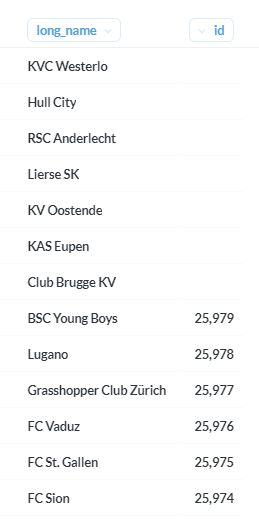

Теперь, чтобы выбрать такие команды, которые **не принимали участия в матчах**, достаточно добавить условие `where m.id is null` (или любое другое поле таблицы `matches`).

```sql
SELECT
    t.long_name
FROM
    sql.teams as t
    LEFT JOIN sql.matches as m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
WHERE m.id IS NULL /*условие: столбец id таблицы m имеет значение null*/
```

>**Обратите внимание!** Если мы добавим какой-либо фильтр по отличному от `NULL` значению для таблицы `matches`, то `LEFT JOIN` превратится в `INNER JOIN`, поскольку для второй таблицы станет необходимым присутствие такого (`NOT NULL`) значения в строке.

```sql
SELECT
    t.long_name
FROM 
    sql.teams as t
    LEFT JOIN sql.matches as m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
WHERE
    m.season = '2008/2009' 
    AND t.long_name = 'KAS Eupen'
```

В ответе Metabase получим *No results!*, так как вместе с фильтром` m.season = '2008/2009'` исчезли все строки, значения которых `NULL`.

**Задание 5.1**

Используя `LEFT JOIN`, выведите список уникальных названий команд, содержащихся в таблице `matches`. Отсортируйте список в алфавитном порядке.

```sql
SELECT DISTINCT
    t.long_name
FROM
    sql.teams as t
    LEFT JOIN sql.matches as m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
WHERE m.id IS NOT NULL
ORDER BY t.long_name ASC
``

С `LEFT JOIN` также работают агрегатные функции, что позволяет не потерять значения из левой таблицы. Например, мы можем вывести сумму голов команд по гостевым матчам.

```sql
SELECT
    t.long_name,
    SUM(m.away_team_goals) as total_goals
FROM
    sql.teams as t
    LEFT JOIN sql.matches as m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
GROUP BY t.id
ORDER BY 2 DESC /*сортировка по столбцу total_goals по убыванию, чтобы увидеть строки со значением null*/
```

>**Обратите внимание!** При применении функций `SUM`, `MIN`, `MAX`, `AVG` к полям со значением **NULL** в результате получится **NULL**, а не 0. А при использовании функции `COUNT`, наоборот, получится 0.

**Задание 5.2**

Используя `LEFT JOIN`, напишите запрос, который выведет полное название команды (`long_name`), количество матчей, в которых участвовала команда, — домашних и гостевых (`matches_cnt`). Отсортируйте по количеству матчей в порядке возрастания, затем — по названию команды в алфавитном порядке.

```sql
SELECT
    t.long_name,
    COUNT(m.id) AS matches_cnt
FROM
    sql.teams as t
    LEFT JOIN sql.matches as m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
GROUP BY t.id, t.long_name /*группируем результаты по названию команды*/
ORDER BY matches_cnt ASC, t.long_name ASC
```

При использовании `RIGHT JOIN` сохраняется та же логика, что и для `LEFT JOIN`, только за основу берётся правая таблица.

Чтобы из `LEFT JOIN` получить `RIGHT JOIN`, нужно просто поменять порядок соединения таблиц.

>Вообще, применение `RIGHT JOIN` считается плохим тоном, так как язык *SQL* читается и пишется слева направо, а такой оператор усложняет чтение запросов.

**FULL OUTER JOIN**

>Оператор `FULL OUTER JOIN` объединяет в себе `LEFT` и `RIGHT JOIN` и позволяет сохранить кортежи обеих таблиц. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц.

Он может быть полезен в ситуациях, когда схема данных недостаточно нормализована и не хватает таблиц-справочников.

**Пример:** в базе данных интернет-магазина есть две таблицы — с зарегистрированными пользователями и пользователями, оформившими заказ. При этом оформить заказ можно без регистрации, а зарегистрироваться — без оформления заказа.

Предположим, что вам необходимо получить полный список пользователей — и оформивших заказ, и зарегистрированных, — но в базе данных этой объединённой таблицы нет. В данном случае можно использовать `FULL OUTER JOIN` для получения полного списка, соединив таким образом таблицы c заказами и регистрациями по *id* пользователя.

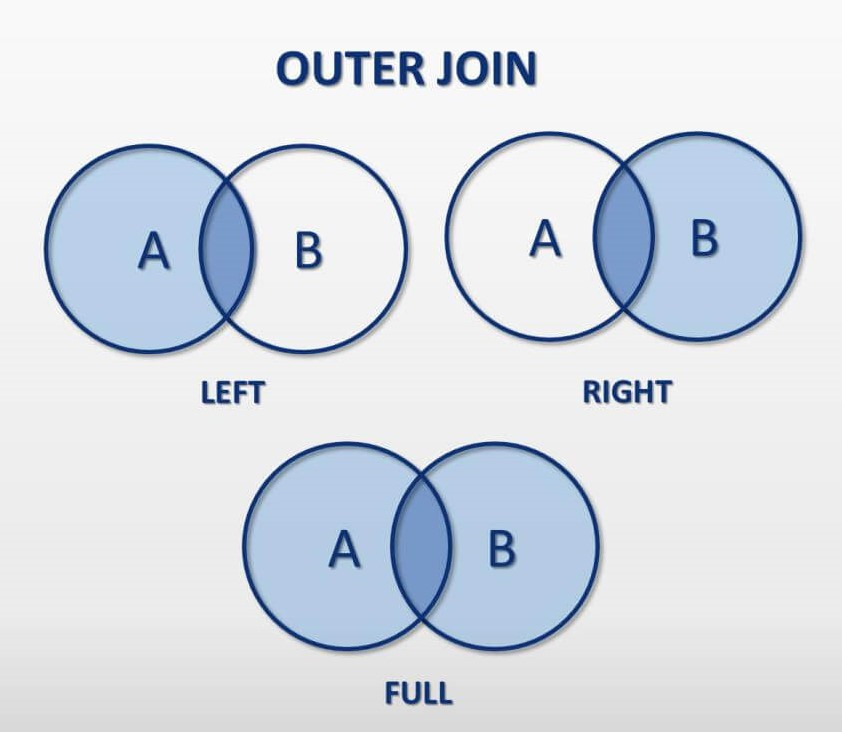

Синтаксис `FULL OUTER JOIN` аналогичен другим `JOIN`.
```sql
SELECT 
…
FROM
	table1
FULL OUTER JOIN table2 ON условие
```

**CROSS JOIN**

>`CROSS JOIN` соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице, иначе говоря, **даёт декартово произведение.**

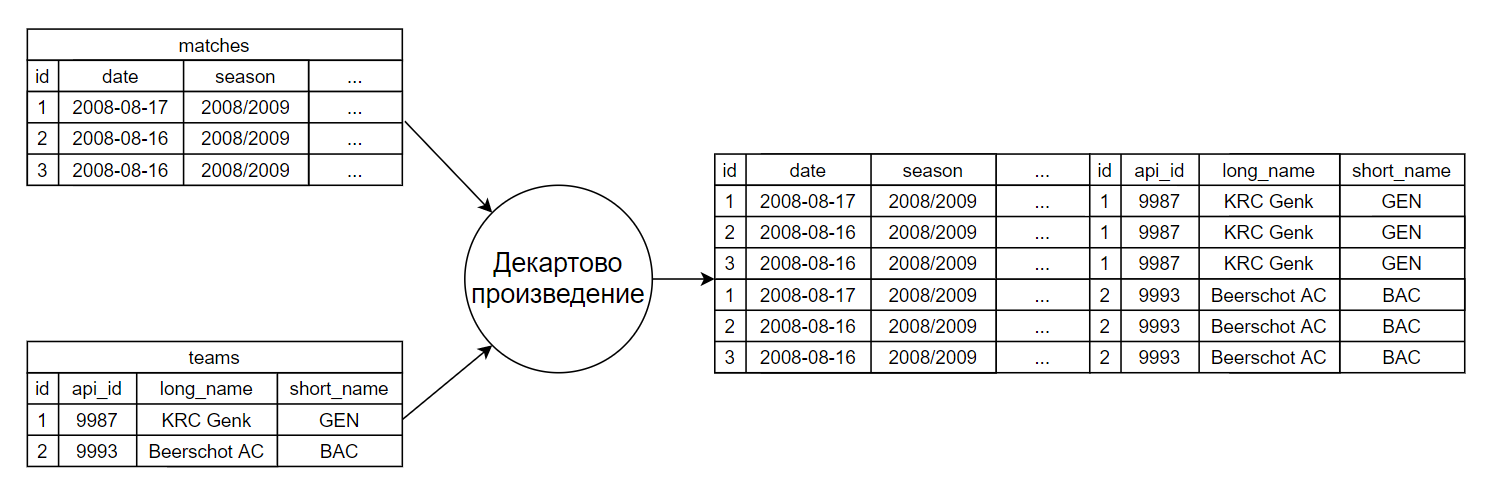

В начале модуля вы использовали этот оператор, записывая таблицы через запятую.

```sql
SELECT *
FROM
    sql.teams,
    sql.matches
```

Этот же запрос можно записать с использованием `CROSS JOIN`.

```sql
SELECT *
FROM
    sql.teams
    CROSS JOIN sql.matches
```

Также этот запрос можно записать с помощью `INNER JOIN` с условием `on true` — результат будет тот же.

```sql
SELECT *
FROM
    sql.teams
    JOIN sql.matches ON TRUE
```
>**Обратите внимание!** Условие для CROSS JOIN, в отличие от других операторов, не требуется.


**CROSS JOIN** может быть полезен, когда необходимо создать таблицу фактов.

Например, с помощью такого запроса мы можем получить **все возможные комбинации полных названий команд в матчах.**

```sql
SELECT
    DISTINCT
    t1.long_name home_team,
    t2.long_name away_team
FROM
    sql.teams t1
    CROSS JOIN sql.teams t2
```

**Задание 5.3**

Напишите запрос, который выведет все возможные уникальные комбинации коротких названий домашней команды (`home_team`) и коротких названий гостевой команды (`away_team`). Команда не может сама с собой играть, то есть быть и домашней, и одновременно гостевой (в одном и том же матче). Отсортируйте запрос по первому и второму столбцам.

```sql
SELECT
    DISTINCT
    t1.short_name AS home_team,
    t2.short_name AS away_team
FROM
    sql.teams AS t1
    CROSS JOIN sql.teams AS t2
WHERE t1.short_name <> t2.short_name /* при условии, что значение t1 не равно t2*/
ORDER BY
    home_team ASC,
    away_team ASC
```

**NATURAL JOIN**

Ключевое слово *natural* в начале оператора `JOIN` *позволяет не указывать условие соединения табли*ц — **для соединения будут использованы столбцы с одинаковым названием из этих таблиц**.

`NATURAL JOIN` можно использовать с любыми видами соединений, которые требуют условия соединения:

→ `NATURAL INNER JOIN` (возможна запись `NATURAL JOIN`);
→ `NATURAL LEFT JOIN`;
→ `NATURAL RIGHT JOIN`;
→ `NATURAL FULL OUTER JOIN`.

При использовании `NATURAL JOIN` прежде всего стоит обратить внимание на **ключи** таблиц. Для наших таблиц `teams` и `matches` этот вид соединения не подойдёт, так как *общим для обеих таблиц является столбец id, но таблицы соединяются по другим столбцам.*

Когда у таблиц есть несколько столбцов с одинаковыми именами, при `NATURAL JOIN` условие соединения будет **применено на все столбцы с одинаковыми именами.**

То есть для таблиц `table1` и `table2`

`table1: id, name, ...`

`table2: id, name, ...`

**запрос**

```sql
SELECT 
…
FROM          table1 NATURAL JOIN table2
```

будет **равнозначен** запросу

```sql
SELECT
…
FROM          table1 t1
INNER JOIN table2 t2 ON t1.id = t2.id AND t1.name = t2.name
```

**ОБЩАЯ ЛОГИКА ПОСТРОЕНИЯ ЗАРОСА С JOIN**

При построении запроса с несколькими `JOIN` старайтесь идти **слева направо**. Сначала выберите таблицу, которая является центральной в соответствии с поставленной задачей, вопросом. Затем добавляйте таблицы поэтапно в зависимости от бизнес-логики запроса.

Например, для ответа на вопрос: «*Какая команда сыграла больше всех матчей в сезоне 2010/2011?*» в качестве центральной лучше выбрать таблицу с **командами**.

А для ответа на вопрос: «*В каком сезоне участвовало больше всего команд?*» — таблицу с **матчами**.

>Стоит отметить, что из рассмотренных видов соединений чаще всего используются `INNER JOIN` и `LEFT JOIN`. Другие операторы используются реже, но стоит помнить об их существовании при решении нестандартных задач.

**ВИДЫ JOIN'ОВ**

- `CROSS JOIN` соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице ― иначе говоря, даёт декартово произведение.

- `INNER JOIN` — это тот же `JOIN` (слово `INNER` в операторе можно опустить).

Для `INNER JOIN` работает следующее **правило**: присоединяются только те строки таблиц, которые удовлетворяют условию соединения. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.

- Ключевое слово `NATURAL` в начале оператора `JOIN` позволяет не указывать условие соединения таблиц — для соединения будут использованы столбцы с одинаковым названием из этих таблиц.

`NATURAL JOIN` можно использовать **с любыми видами соединений, которые требуют определённого условия:**

  - NATURAL INNER JOIN (возможна запись NATURAL JOIN);
  - NATURAL LEFT JOIN;
  - NATURAL RIGHT JOIN;
  - NATURAL FULL OUTER JOIN.

При использовании `NATURAL JOIN` прежде всего стоит обратить внимание на **ключи таблиц.**

*Когда у таблиц есть несколько столбцов с одинаковыми именами, при NATURAL JOIN условие соединения будет применено на все столбцы с одинаковыми именами.*

- Для `LEFT JOIN` работает следующее **правило**: из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение **NULL**.

`LEFT JOIN` полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы.

Чтобы из `LEFT JOIN` получить `RIGHT JOIN`, нужно просто поменять порядок соединения таблиц.

- `FULL OUTER JOIN` объединяет в себе `LEFT` и `RIGHT JOIN` и позволяет **сохранить кортежи обеих таблиц**. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц.

`FULL OUTER JOIN` может быть полезен в ситуациях, когда *схема данных недостаточно нормализована* и не хватает таблиц-справочников.

**Пример**: в базе данных интернет-магазина есть две таблицы — с зарегистрированными пользователями и пользователями, оформившими заказ. При этом оформить заказ можно без регистрации, а зарегистрироваться — без оформления заказа.

Предположим, что вам необходимо получить полный список пользователей — и оформивших заказ, и зарегистрированных, — но в базе данных этой объединённой таблицы нет. В данном случае можно использовать `FULL OUTER JOIN` для получения полного списка, соединив таким образом таблицы c заказами и регистрациями по `id` пользователя.

- Для `RIGHT JOIN` работает следующее правило: из правой (относительно оператора) таблицы сохраняются все строки, а из левой добавляются только те, которые соответствуют условию соединения. Если в левой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение `NULL`.

`RIGHT JOIN` полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы.

Чтобы из `RIGHT JOIN` получить `LEFT JOIN`, нужно просто поменять порядок соединения таблиц.

>Вообще, применение `RIGHT JOIN` считается дурным тоном, так как язык SQL читается и пишется слева направо, и этот оператор усложняет чтение запросов.


**Задание 6.1**

Напишите запрос, который выведет список уникальных полных названий команд (`long_name`), игравших в гостях в матчах сезона '2012/2013'. Отсортируйте список в алфавитном порядке.

```sql
SELECT DISTINCT
    t.long_name
FROM sql.teams AS t
    JOIN sql.matches as m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
WHERE m.season = '2012/2013'
ORDER BY t.long_name ASC
```

**Задание 6.2**

Напишите запрос, который выведет полное название команды (`long_name`) и общее количество матчей (`matches_cnt`), сыгранных командой 'Inter' в домашних матчах.

```sql
SELECT
    t.long_name,
    COUNT(m.id) as matches_cnt
FROM
    sql.teams as t
    JOIN sql.matches AS m ON t.api_id = m.home_team_api_id
WHERE t.long_name = 'Inter'
GROUP BY t.long_name
```

**Задание 6.3**

Напишите запрос, который выведет топ-10 команд (`long_name`) по суммарному количеству забитых голов в гостевых матчах. Во втором столбце запроса выведите суммарное количество голов в гостевых матчах (`total_goals`).

```sql
SELECT
    t.long_name,
    SUM(m.away_team_goals) AS total_goals
FROM
    sql.matches as m
    JOIN sql.teams as t ON t.api_id = m.away_team_api_id
GROUP BY t.long_name
ORDER BY total_goals DESC
LIMIT 10
```

**Задание 6.4**

Выведите количество матчей между командами 'Real Madrid CF' и 'FC Barcelona'. В поле ниже введите запрос, с помощью которого вы решили задание.

```sql
SELECT
    COUNT(*)
FROM
    sql.matches as m
    JOIN sql.teams as h ON h.api_id = m.home_team_api_id 
    JOIN sql.teams as a ON a.api_id = m.away_team_api_id
WHERE (h.long_name = 'Real Madrid CF' AND a.long_name = 'FC Barcelona') OR (a.long_name = 'Real Madrid CF' AND h.long_name = 'FC Barcelona')
```

**Задание 6.5**

Напишите запрос, который выведет название команды (`long_name`), сезон (`season`) и суммарное количество забитых голов в домашних матчах (`total_goals`). Оставьте только те строки, в которых суммарное количество голов менее десяти. Отсортируйте запрос по названию команды, а затем — по сезону.

```sql
SELECT
    t.long_name,
    m.season,
    SUM(m.home_team_goals) as total_goals
FROM
    sql.matches as m
    JOIN sql.teams as t ON t.api_id = m.home_team_api_id
GROUP BY 
    t.id, 
    m.season
HAVING SUM(m.home_team_goals) < 10
ORDER BY
    t.long_name ASC, m.season ASC
```

### <center> ВОПРОСЫ ДЛЯ СОБЕСЕДОВАНИЙ

##### Вопрос 1

*Объясните разницу между левым (LEFT) и внутренним (INNER) соединениями.*

**Соединения** — это способы объединения данных из двух разных таблиц (левой и правой) в новую.

Принцип работы соединений заключается в объединении строк между двумя таблицами; набор ключевых столбцов используется для поиска данных в двух одинаковых таблицах, которые необходимо соединить.

В случае **левого** соединения каждая строка из левой таблицы появляется в полученной таблице, но строки из правой появляются, только если значения в их ключевых столбцах отображаются в левой. При **внутреннем** соединении обе строки из левой и правой таблиц появляются, только если есть совпадающая строка в другой таблице.

На практике вы можете воспринимать левое соединение как добавление данных из правой таблицы к левой, если она существует (например, с использованием правой таблицы в качестве подстановочной). Внутреннее соединение больше похоже на поиск всех общих данных и создание новой таблицы только из пар.

	
Объясните разницу между левым (LEFT) и внутренним (INNER) соединениями.

ПРИМЕР ОТВЕТА
Соединения — это способы объединения данных из двух разных таблиц (левой и правой) в новую.

Принцип работы соединений заключается в объединении строк между двумя таблицами; набор ключевых столбцов используется для поиска данных в двух одинаковых таблицах, которые необходимо соединить.

В случае левого соединения каждая строка из левой таблицы появляется в полученной таблице, но строки из правой появляются, только если значения в их ключевых столбцах отображаются в левой. При внутреннем соединении обе строки из левой и правой таблиц появляются, только если есть совпадающая строка в другой таблице.

На практике вы можете воспринимать левое соединение как добавление данных из правой таблицы к левой, если она существует (например, с использованием правой таблицы в качестве подстановочной). Внутреннее соединение больше похоже на поиск всех общих данных и создание новой таблицы только из пар.

*Обратите внимание, что в нашем варианте ответа мы не упоминали какие‐либо сложности, связанные с появлением повторяющихся строк в данных. Возможно, о них стоит упомянуть, потому что повторяющиеся строки могут повлиять на результат, но с большей долей вероятности эта информация может увести вас от мысли, которую вы пытаетесь донести до интервьюера.*

##### Вопрос 2

	
Перед вами школьная таблица TABLE_A с оценками от 0 до 100, выставленными ученикам нескольких классов. 

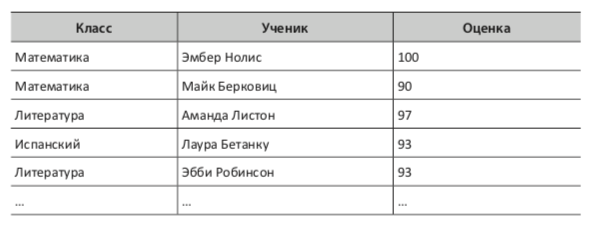

Как бы вы рассчитали максимальную оценку в каждом классе?

**ПРИМЕР ОТВЕТА:**

Запрос для поиска наивысшей оценки в каждом классе может выглядеть так:

```sql
SELECT 
  CLASS, 
  MAX(GRADE) INTO TABLE_B 
FROM 
  TABLE_A 
GROUP BY 
  CLASS
```

Этот запрос группирует данные по каждому классу, а затем находит максимальное значение. Он дополнительно сохраняет результаты в новую таблицу (TABLE_B), чтобы их можно было запросить позже.

У соискателей этот вопрос обычно вызывает трудности. Одна из причин — непонимание, что именно нужно группировать (в данном случае переменную класса). Другая — в том, что вопрос кажется настолько простым, что соискатели начинают слишком усложнять ответ и упускают простое решение.

Если вы услышали вопрос, который кажется вам слишком лёгким, вполне возможно, что таким он и является.

К слову, строка INTO TABLE_B была совершенно необязательной, но она хорошо подготовит вас к следующему вопросу.

##### Вопрос 3

Рассмотрим таблицу из предыдущего вопроса.

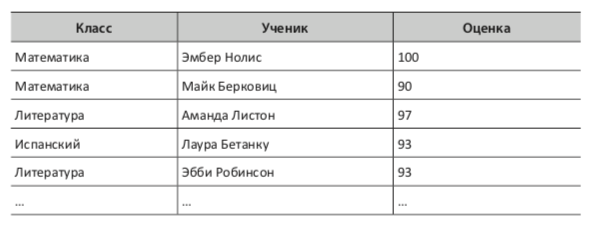

Как найти не только самую высокую оценку в каждом классе и учащегося, получившего её?

Предполагая, что у нас есть результат предыдущего запроса, сохранённый в TABLE_B, мы можем использовать его в этом решении:

```sql
SELECT 
  a.CLASS, 
  a.GRADE, 
  a.STUDENT 
FROM 
  TABLE_A a 
  INNER JOIN TABLE_B b ON a.CLASS = b.CLASS 
  AND a.GRADE = b.GRADE
```

Этот запрос выбирает всех учащихся и их оценки из исходной таблицы TABLE_A, где указаны классы и оценки, которые отображаются в таблице максимальных значений TABLE_B. Внутреннее соединение работает как фильтр, сохраняя только максимальные комбинации классов/оценок, потому что только в этом случае оценка появляется в таблице TABLE_B.

В качестве альтернативы можно было бы использовать подзапрос, чтобы сделать то же самое, не вызывая таблицу TABLE_B:

```sql
SELECT 
  a.CLASS, 
  a.GRADE, 
  a.STUDENT 
FROM 
  TABLE_A a 
  INNER JOIN (
    SELECT 
      CLASS, 
      MAX(GRADE) 
    FROM 
      TABLE_A 
    GROUP BY 
      CLASS
  ) b ON a.CLASS = b.CLASS 
  AND a.GRADE = b.GRADE
```
Примечание. Подзапросы мы будем проходить чуть позднее, так что, ознакомившись сейчас, вернитесь к этому варианту, когда изучите синтаксис подзапросов.

Как видите, эту задачу можно решить несколькими способами, но любое решение почти наверняка требует более одного запроса из таблицы TABLE_A, поэтому этот вопрос может легко поставить в тупик. На бумаге решение может показаться лёгким, но додуматься до него во время интервью может быть непросто. Даже если вы ответили неправильно, это не значит, что вы провалились.

Решение не даёт каких‐либо специфичных случаев для привязки к максимальному значению. В примере будут возвращены строки для нескольких студентов. Возможно, стоит указать на этот факт интервьюеру, потому что так вы показываете, что обращаете внимание на пограничные случаи.

